In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
ruta = r'/Users/instructorzamora/Documents/3_Maestria_Estadistica_UNINORTE/3_Tercer_Semestre/Machine_Learning/tornados.csv.zip'  
df = pd.read_csv(ruta)
df.isnull().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [3]:
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
# Imputar los valores NaN con la media de la columna 'mag'
df['mag'] = df['mag'].fillna(df['mag'].mean())

In [4]:
df.shape

(68693, 27)

Implementación Regresión Lasso L1

In [5]:
import numpy as np

In [6]:
# Definir X y y (asegúrate de que ya tienes estas variables previamente definidas)
X = df[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid','fat','f1', 'f2', 'f3', 'f4','loss']]
y = df['inj']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lr = LinearRegression().fit(X_train, y_train)

In [7]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(lasso.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = lasso.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo Lasso:")
print(coeficientes)

print("\nIntercepto del modelo Lasso:")
print(intercepto)


Training set score: 0.59
Test set score: 0.65
Number of features used: 9
Coeficientes del modelo Lasso:
mag     0.000000e+00
slat   -0.000000e+00
slon    7.539867e-03
elat   -0.000000e+00
elon    5.577088e-03
len     1.695515e-01
wid     2.760373e-03
fat     7.099604e+00
f1     -4.412743e-04
f2      2.441023e-03
f3      6.501204e-04
f4      0.000000e+00
loss    1.289027e-07
dtype: float64

Intercepto del modelo Lasso:
0.7162750490559678


In [8]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(lasso001.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = lasso001.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo lasso001:")
print(coeficientes)

print("\nIntercepto del modelo lasso001:")
print(intercepto)


Training set score: 0.59
Test set score: 0.66
Number of features used: 13
Coeficientes del modelo lasso001:
mag     1.022849e+00
slat   -2.163464e-02
slon    6.103477e-03
elat    1.443582e-02
elon    9.277690e-03
len     1.329007e-01
wid     9.106679e-04
fat     7.640309e+00
f1     -6.663740e-04
f2      9.927145e-04
f3      1.946659e-03
f4      9.585565e-03
loss    1.143144e-07
dtype: float64

Intercepto del modelo lasso001:
0.8033124394702692


In [9]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(lasso00001.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = lasso00001.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo lasso00001:")
print(coeficientes)

print("\nIntercepto del modelo lasso00001:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Number of features used: 13
Coeficientes del modelo lasso00001:
mag     1.039166e+00
slat   -2.339887e-02
slon    5.486804e-03
elat    1.674618e-02
elon    1.015659e-02
len     1.322325e-01
wid     8.844667e-04
fat     7.645438e+00
f1     -6.756783e-04
f2      9.715061e-04
f3      1.961393e-03
f4      9.774258e-03
loss    1.141645e-07
dtype: float64

Intercepto del modelo lasso00001:
0.8018051980000763


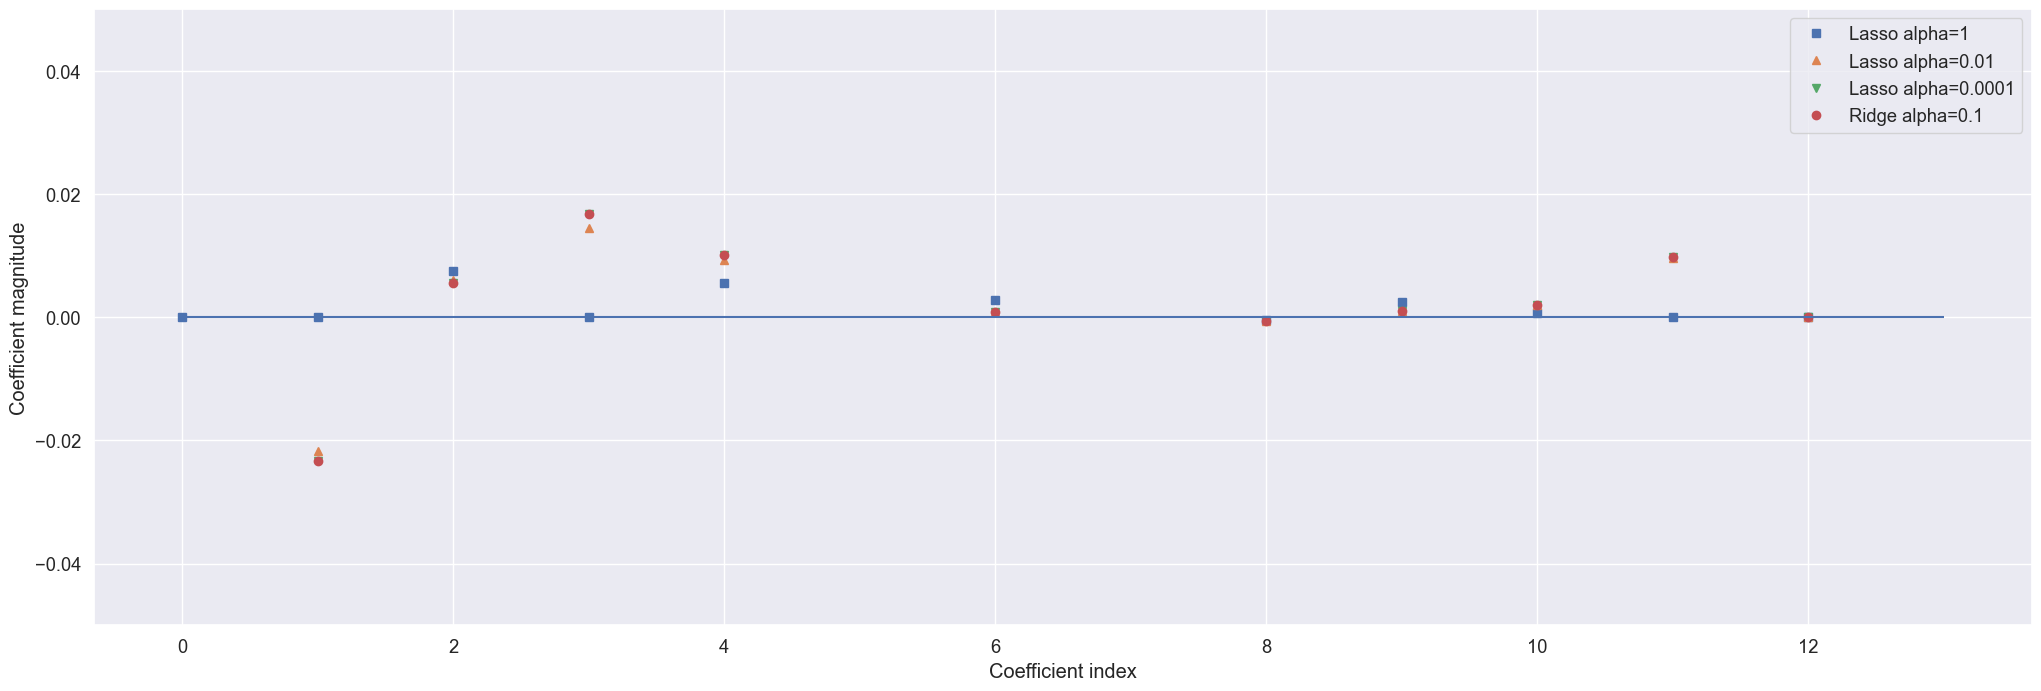

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(font_scale=1.2)


# Establecer el tamaño de la fuente
sns.set(font_scale=1.2)

# Crear la figura
plt.figure(figsize=(25, 8))

# Graficar los coeficientes para diferentes modelos
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")  # Tamaño de marcador aumentado
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

# Ajustar las etiquetas y las líneas de referencia
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Línea horizontal en y = 0 para visualización
plt.hlines(0, 0, len(lr.coef_))

# Ajustar el límite del eje Y
plt.ylim(-0e3, 0e3)  # Ajusta según el rango de los coeficientes (puedes modificar esto)

# Cambiar el eje Y a una escala logarítmica si la disparidad es muy grande
# plt.yscale('symlog')  # Descomenta esta línea si quieres usar una escala logarítmica

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()